<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
<p>
Cette activité est réalisée dans le cadre du cours ``Analysez vos données textuelles`` diffusé en MOOC par
**<font color='blus'>Openclassrooms</font>**.
</p>    
<p></p>
<p></p>
Le but de cette activité est de nettoyer le texte et de créer un jeu de données d’entraînement en vue de créer un moteur de résumé automatique. Voici les données que vous utiliserez  : 
    
    https://drive.google.com/uc?export=download&id=0BwmD_VLjROrfTHk4NFg2SndKcjQ
    
## Contexte

Les données brutes représentent un corpus d’articles CNN récupérés par des chercheurs pour leurs expérimentations. L’objectif est de récupérer les features des documents et les highlights (résumés courts) associés concaténés, en vue d’entraîner un potentiel modèle de création de résumé d’articles.

* Article Argentina coach Alejandro Sabella believes Lionel Messi’s habit of throwing up during games is because of nerves. The Barcelona star has vomited on the pitch during several games over the last few seasons and appeared to once again during Argentina’s last warm-up match against Slovenia on Saturday….

<p></p>
* Highlight Argentina coach Sabella believes Messi’s habit of being sick during games is down to nerves.

## Consigne
Vous devrez effectuer les opérations de traitement suivantes sur le texte, pas forcément dans cet ordre

* Créer des paires de document (article, highlights)
* Suppression de la ponctuation
* Séparation en token en minuscules
* Suppression des stopwords pour les articles
* Calcul des fréquences et tf-idf sur les deux types de documents
* Enregistrement du nouveau jeu de données d’entraînement pour usage ultérieur

## Livrables
Le code de création du jeu de données d’entraînement.    

In [43]:
import p6_util_activity 

#-----------------------------------------------------------------------------
# This constant allows to limit the number of CNN files to be read.
#
# When value is fixed to None, then all files from CNN corpus will be read.
# This option require 16GB RAM.
#
# For reading CNN files without any restrictions : max_read_count=None
#-----------------------------------------------------------------------------
max_read_count=100

#-----------------------------------------------------------------------------
# This constant is the path in order to write NLP processed files 
# (train dataset)
#-----------------------------------------------------------------------------
file_path ="./data/cnn_new"

For each pair of files, frequencies are recorded into dictionary ``dict_article_highlight`` as component of a tuple.

Format of ``dict_article_highlight`` is as following : ``{#ID:(tokenized_article,tokenized_highlight,dict_article_freq,dict_highlight_freq)}``

* ``tokenized_article`` : list of tokens issued from article
* ``tokenized_highlight`` : list of tokens issued from highlight
* ``dict_article_freq`` is formated as : ``{token:token_frequency}``
* ``dict_highlight_freq`` is formated as : ``{token:token_frequency}``

In [2]:
data_path = './data/cnn/stories'
dict_article, dict_highlight = p6_util_activity.read_cnn_corpora(data_path, p_restriction=None, read_count=max_read_count)

print(len(dict_article), len(dict_highlight))


100 100


#### Frequencies computing over raw articles and highlights

* Frequencies are computed for both type of content (raw articles and raw highlights)

In [46]:
import p6_util_activity

dict_article_freq = p6_util_activity.compute_frequency(dict_article)
print("Taille du dictionnaire des frequences de mots pour les articles: "+str(len(dict_article_freq.keys())))

dict_highlight_freq = p6_util_activity.compute_frequency(dict_highlight)
print("Taille du dictionnaire des frequences de mots pour les hightlights: "+str(len(dict_highlight_freq.keys())))


Taille du dictionnaire des frequences de mots pour les articles: 11509
Taille du dictionnaire des frequences de mots pour les hightlights: 1996


**Plot of word frequencies from raw files**

* Plot of frequencies for hilights.

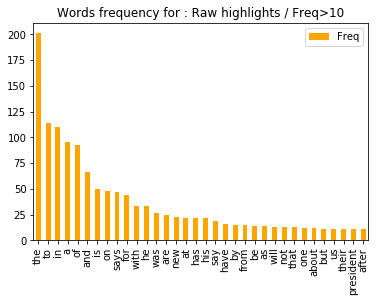

In [47]:
import p6_util_activity

p6_util_activity.dict_plot_frequency(dict_highlight_freq,"Raw highlights",query="Freq>10")

* Plot of frequencies for articles.

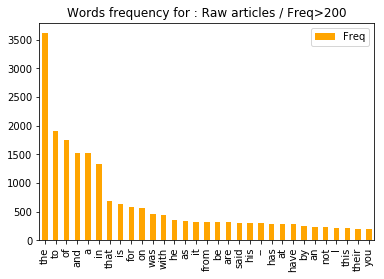

In [5]:
import p6_util_activity

p6_util_activity.dict_plot_frequency(dict_article_freq,"Raw articles",query="Freq>200")

#### TF-IDF computing for raw articles and highlights

* TF-IDF are computed for both type of content (raw articles and raw highlights)

In [6]:
import p6_util_activity

tfidf_vectorizer = p6_util_activity.get_tfidf_vectorizer(dict_article, doc_type='string')
dict_tfidf_art = p6_util_activity.get_dict_tfidf(tfidf_vectorizer)
print("Taille du dictionnaire des valeurs TFIDF des mots pour les articles bruts: "+str(len(dict_tfidf_art.keys())))

tfidf_vectorizer= p6_util_activity.get_tfidf_vectorizer(dict_highlight, doc_type='string')
dict_tfidf_hig = p6_util_activity.get_dict_tfidf(tfidf_vectorizer)
print("Taille du dictionnaire des valeurs TFIDF des mots pour les highlights bruts: "+str(len(dict_tfidf_hig.keys())))


Taille du dictionnaire des valeurs TFIDF des mots pour les articles bruts: 9624
Taille du dictionnaire des valeurs TFIDF des mots pour les highlights bruts: 1942


**NLP process for articles : **
* removing stopwords for english language
* removing punctuation
* tokenizing each document

In [7]:
import nltk
import p6_util_activity

for root_name in dict_article.keys():
    article = p6_util_activity.cb_remove_punctuation(dict_article[root_name])
    article = p6_util_activity.cb_remove_stopwords(article)
    dict_article[root_name] = nltk.word_tokenize(article)


**NLP process for highlights : **
* removing punctuation
* tokenizing each document

In [8]:
import nltk
import p6_util_activity

for root_name in dict_highlight.keys():
    highlight = p6_util_activity.cb_remove_punctuation(dict_highlight[root_name])
    dict_highlight[root_name] = nltk.word_tokenize(highlight)


**Writing pair of cleaned files : articles and highllights**

Resulting files are created into directory ``cnn_new``.

They are named with same root-name then original files.

Extension ``.art`` are tokenized files containing articles.

Extension ``.hig`` are tokenized files containing highlights concatened contents.

Files names with same root name are those for which highlights and articles do match.




In [9]:
import p6_util_activity

cnn_new_dir = file_path
p6_util_activity.build_directory(cnn_new_dir)

p6_util_activity.write_train_set(cnn_new_dir, dict_article, dict_highlight)

Directory ./data/cnn_new Already exists!


**Read cleaned files**

In [10]:
import p6_util_activity

dict_article, dict_highlight = p6_util_activity.read_train_set(file_path,read_count=max_read_count)
print(len(dict_article), len(dict_highlight))

100 100


#### Frequencies computing over articles and highlights issued from cleaned files

* Cleaned files for articles and hilights are read.
* Frequencies are computed for both type of content (articles and highlights)

In [48]:
import p6_util_activity

dict_freq_art = p6_util_activity.compute_frequency(dict_article)
print("Taille du dictionnaire des frequences des mots pour les articles traités: "+str(len(dict_tfidf_art.keys())))

dict_freq_hig = p6_util_activity.compute_frequency(dict_highlight)
print("Taille du dictionnaire des fréquences des mots pour les highlights traités: "+str(len(dict_tfidf_hig.keys())))


Taille du dictionnaire des frequences des mots pour les articles traités: 11498
Taille du dictionnaire des fréquences des mots pour les highlights traités: 1988


**Plot of word frequencies from cleaned files**

* Plot of frequencies for clean hilights.

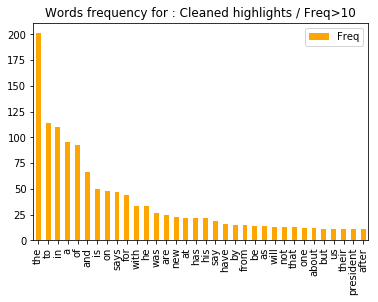

In [49]:
import p6_util_activity

p6_util_activity.dict_plot_frequency(dict_freq_hig,"Cleaned highlights",query="Freq>10")

* Plot of frequencies for claned articles.

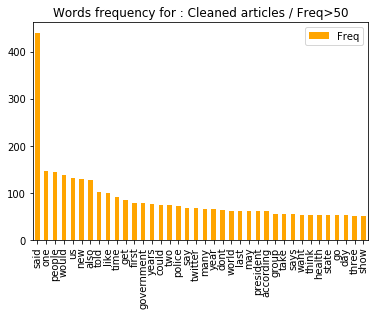

In [50]:
import p6_util_activity

p6_util_activity.dict_plot_frequency(dict_freq_art,"Cleaned articles",query="Freq>50")

#### TF-IDF computing over articles and highlights

* Files from cleaned articles and hilights are read.
* TF-IDF weights are computed for both type of content (articles and highlights)

In [14]:
import p6_util_activity
print(file_path)
dict_article, dict_highlight = p6_util_activity.read_train_set(file_path)
print(len(dict_article), len(dict_highlight))

./data/cnn_new
100 100


In [15]:
import p6_util_activity

vectorizer = p6_util_activity.get_tfidf_vectorizer(dict_article, doc_type='string')
dict_tfidf_art = p6_util_activity.get_dict_tfidf(vectorizer)
print("Taille du dictionnaire des valeurs TFIDF des mots pour les articles traités: "+str(len(dict_tfidf_art.keys())))

vectorizer = p6_util_activity.get_tfidf_vectorizer(dict_highlight, doc_type='string')
dict_tfidf_hig = p6_util_activity.get_dict_tfidf(vectorizer)
print("Taille du dictionnaire des valeurs TFIDF des mots pour les highlights traités: "+str(len(dict_tfidf_hig.keys())))


Taille du dictionnaire des valeurs TFIDF des mots pour les articles traités: 11498
Taille du dictionnaire des valeurs TFIDF des mots pour les highlights traités: 1988


### <font color='blue'>Test highlights predictions</font>

* Target to be predicted are hightlights while input data are articles.
* 2 predictors models are tested : ``MultinomialNB`` and ``RandomForests``
* No models evaluation have been conducted.

**Read cleaned files**

In [16]:
import p6_util_activity
dict_article, dict_highlight = p6_util_activity.read_train_set(file_path,read_count=max_read_count)
print(len(dict_article), len(dict_highlight))

100 100


**Data is splitted into train and test**

* 70% dataset for training model
* 30% dataset for testing model

In [17]:
import p6_util_activity
dict_X_train, dict_X_test, dict_y_train, dict_y_test = p6_util_activity.split_train_test(dict_article, dict_highlight, train_ratio = 0.7)
print(len(dict_X_train), len(dict_X_test), len(dict_y_train), len(dict_y_test))

70 30 70 30


Compute TFIDF matrix from ``X`` using ``TfidfTransformer`` with option ``use_idf=True`` (default option)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(norm="l2", use_idf=True)
X_train = vectorizer.fit_transform(dict_X_train.values())
y_train = list(dict_y_train.values())

#### Use ``MultinomialNB`` as predictor

In [19]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

In [20]:
X_test = vectorizer.transform(dict_X_test.values())
y_test=list(dict_y_test.values())

In [34]:
y_pred = clf.predict(X_test)

In [35]:
n=10
print("\n---------- MultinomialNB : Predicted highlight for article # {} -----------------------\n".format(str(n)))
print(y_pred[n])
print("\n---------- MultinomialNB : Tested highlight for article # {} --------------------------\n".format(str(n)))
print(y_test[n])


---------- MultinomialNB : Predicted highlight for article # 10 -----------------------

new tournament will go on without woods president of golfers foundation says woods had minor injuries in the onecar crash near his home early friday police will continue investigating after woods delays giving statement for third time woods on web site the only person responsible for the accident is me

---------- MultinomialNB : Tested highlight for article # 10 --------------------------

former aide to jim mcgreevey says he and the couple had sexual relations dina matos mcgreevey denies says husband has cronies after her jim mcgreevey confirms aides accounts given to reporters mcgreeveys are in the process of divorcing he announced resignation in 04


#### Use ``RandomForest`` as predictor

In [31]:
from sklearn.ensemble import RandomForestClassifier

nb_estimators = 20
rfc = RandomForestClassifier(n_estimators=nb_estimators)
rfc_model = rfc.fit(X_train, y_train)

In [32]:
y_pred = rfc_model.predict(X_test)

In [33]:
n=10
print("\n---------- RandomForest : Predicted highlight for article # {} -----------------------\n".format(str(n)))
print(y_pred[n])
print("\n---------- RandomForest: Tested highlight for article # {} --------------------------\n".format(str(n)))
print(y_test[n])



---------- RandomForest : Predicted highlight for article # 10 -----------------------

520 people have died in belgium between april and july researchers speculate the deaths are linked to high temperatures many victims were older and had underlying health problems new july temperatures have been abnormally high

---------- RandomForest: Tested highlight for article # 10 --------------------------

former aide to jim mcgreevey says he and the couple had sexual relations dina matos mcgreevey denies says husband has cronies after her jim mcgreevey confirms aides accounts given to reporters mcgreeveys are in the process of divorcing he announced resignation in 04
